In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyRegressor 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')

In [532]:
train = pd.read_csv('../data/train.csv')
test =  pd.read_csv('../data/test.csv')
muestra = pd.read_csv('../data/muestra.csv')

In [533]:
# Concatenar train y test
lab = pd.concat([train, test], ignore_index=True)

# Separar en X e Y
Y = lab['Price']
X = lab.drop('Price', axis=1)

In [534]:
lab.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [535]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 132.4+ KB


In [536]:
lab.rename(columns={' Storage': 'Storage'}, inplace=True)

In [537]:
lab['Category'].value_counts()

Category
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: count, dtype: int64

In [538]:
lab['Manufacturer'].value_counts()

Manufacturer
Dell         297
Lenovo       297
HP           274
Asus         157
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [539]:
len(lab['Model Name'].value_counts())

617

In [540]:
# lab['Model Name'].value_counts()

In [541]:
lab.Screen.value_counts()

Screen
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440        

In [542]:
len(lab.CPU.value_counts())

118

In [543]:
lab.Storage.value_counts().index

Index(['256GB SSD', '1TB HDD', '500GB HDD', '512GB SSD',
       '128GB SSD +  1TB HDD', '128GB SSD', '256GB SSD +  1TB HDD',
       '32GB Flash Storage', '2TB HDD', '64GB Flash Storage',
       '512GB SSD +  1TB HDD', '1TB SSD', '256GB SSD +  2TB HDD', '1TB Hybrid',
       '256GB Flash Storage', '16GB Flash Storage', '32GB SSD', '1GB SSD',
       '128GB Flash Storage', '16GB SSD', '512GB Flash Storage',
       '1TB SSD +  1TB HDD', '512GB SSD +  2TB HDD', '256GB SSD +  500GB HDD',
       '128GB SSD +  2TB HDD', '256GB SSD +  256GB SSD',
       '512GB SSD +  256GB SSD', '512GB SSD +  512GB SSD',
       '64GB Flash Storage +  1TB HDD', '1TB HDD +  1TB HDD', '32GB HDD',
       '64GB SSD', '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid',
       '512GB SSD +  1TB Hybrid', '256GB SSD +  1TB Hybrid'],
      dtype='object', name='Storage')

In [544]:
len(lab.GPU.value_counts())

110

In [545]:
lab['Operating System'].value_counts()

Operating System
Windows      1124
No OS          66
Linux          62
Chrome OS      27
macOS          13
Mac OS          8
Android         2
Name: count, dtype: int64

In [546]:
lab['Operating System Version'].value_counts()

Operating System Version
10      1071
7         45
X          8
10 S       8
Name: count, dtype: int64

In [547]:
lab['Price'].describe().T

count        977.00
mean    10018994.56
std      6306430.02
min      1706374.80
25%      5326308.00
50%      8527428.00
75%     13115700.00
max     54232308.00
Name: Price, dtype: float64

### Primeras impresiones

- La columna Operating System Version tiene algunos nulos.
- Hay varias columnas que se pueden transformar a int: Screen Size, RAM, Storage, Weight
- De otras columnas se agruparán y seleccionarán los valores unicos más relevantes: Screen, CPU, Storage, GPU, Manufacturer
- Hay candidatas para ser eliminadas: Model Name

## Limpieza

Empecemos por las conversiones num

In [548]:
lab['Screen Size'] = lab['Screen Size'].str.replace('"', '')
lab['Screen Size'].value_counts()

Screen Size
15.6    664
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [549]:
lab['RAM'] = lab['RAM'].str.replace('GB', '')
lab['RAM'].value_counts()

RAM
8     619
4     375
16    199
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

In [550]:
lab['Weight'] = lab['Weight'].str.replace('kg', '')
lab['Weight'] = lab['Weight'].str.replace('s', '')
# lab['Weight'].value_counts()

Operating System y Model Name, chao

In [551]:
lab = lab.drop(['Model Name', 'Operating System Version'], axis=1)

Ahora un poquito de modificaciones para optimizar el ml

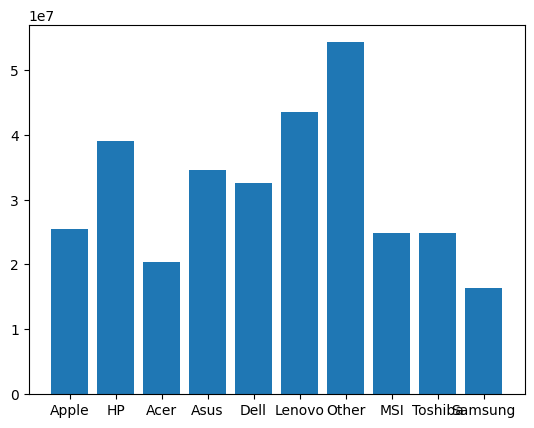

In [552]:
man = lab['Manufacturer'].value_counts().index.tolist()

man = ['Dell',
 'Lenovo',
 'HP',
 'Asus',
 'Acer',
 'Toshiba',
 'MSI',
 'Apple',
 'Samsung',
 'Other']

m = []
for i in lab['Manufacturer']:
    if i in man:
        m.append(i)
    else:
        i = 'Other'
        m.append(i)

lab['Manufacturer'] = m

x = lab['Manufacturer']
y = lab['Price']
plt.bar(x, y)
plt.show()

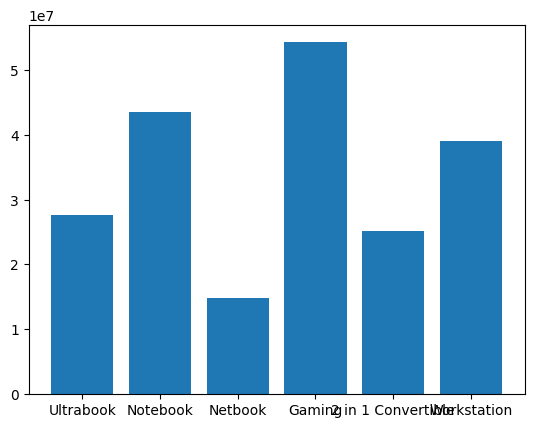

In [553]:
x = lab['Category']
y = lab['Price']
plt.bar(x, y)
plt.show()

In [554]:
lab['Touchscreen'] = 0

for i, valor in enumerate(lab['Screen']):
    if 'Touchscreen' in valor:
        lab.at[i, 'Touchscreen'] = 1

lab['Touchscreen'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Touchscreen, dtype: int64

In [555]:
lab['Touchscreen'].value_counts()

Touchscreen
0    1111
1     191
Name: count, dtype: int64

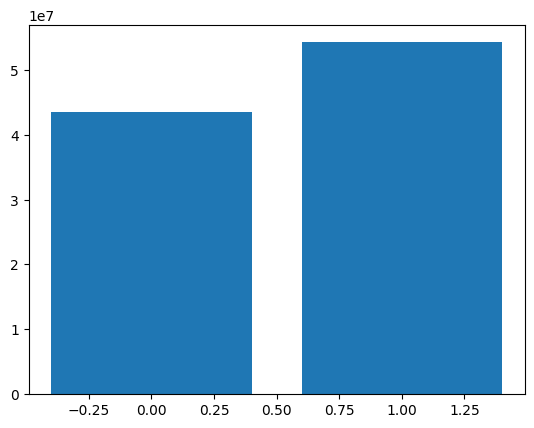

In [556]:
x = lab['Touchscreen']
y = lab['Price']
plt.bar(x, y)
plt.show()

In [557]:
conversiones = {
    3 : ['2880x1800', '3840x2160', '3200x1800', '3200x1800'],
    2 : ['2400x1600', '2560x1600', '2560x1440', '2736x1824'],
    1 : ['1920x1200', '1920x1080', '2256x1504', '2304x1440', '2160x1440'],
    0 : ['1366x768', '1440x900', '1600x900']
}

for i, valor in enumerate(lab['Screen']):
    for conversion, resoluciones in conversiones.items():
        if any(resolucion in valor for resolucion in resoluciones):
            lab.at[i, 'Screen'] = conversion
            break


lab['Screen'].value_counts()


Screen
1    860
0    335
3     73
2     34
Name: count, dtype: int64

In [558]:
pd.set_option('display.max_rows', None)
a = lab['CPU'].value_counts().index
print(a)


Index(['Intel Core i5 7200U 2.5GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i5 6200U 2.3GHz',
       'Intel Core i3 6006U 2GHz', 'Intel Core i7 6500U 2.5GHz',
       'Intel Core i7 6700HQ 2.6GHz', 'Intel Core i3 7100U 2.4GHz',
       ...
       'Intel Core i5 7500U 2.7GHz', 'Intel Core i7 2.8GHz',
       'Intel Core i3 6100U 2.1GHz', 'AMD E-Series E2-9000 2.2GHz',
       'Intel Core i7 2.2GHz', 'Intel Core M M3-6Y30 0.9GHz',
       'AMD A9-Series 9420 2.9GHz', 'Intel Core i3 6006U 2.2GHz',
       'AMD A6-Series 7310 2GHz', 'Intel Xeon E3-1535M v6 3.1GHz'],
      dtype='object', name='CPU', length=118)


In [559]:
lab['Brand'] = lab['CPU'].str.split().str[0]
lab['Generation'] = lab['CPU'].str.extract('(\d{4})')
lab['Speed'] = lab['CPU'].str.extract('(\d+\.\d+)').astype(float)

most_common_generation = lab['Generation'].mode().values[0]
lab['Generation'].fillna(most_common_generation, inplace=True)

#nulos
most_common_speed = lab['Speed'].mode().values[0]
lab['Speed'].fillna(most_common_speed, inplace=True)

#clasif
brand_mapping = {'Intel': 0, 'AMD': 1}
lab['Brand'] = lab['Brand'].map(brand_mapping)

# Normalizar la clumna 'Generation' dividiendo por 1000 para obtener una representación numérica
lab['Generation'] = lab['Generation'].astype(int) / 1000

# Normalizar la columna 'Speed' dividiendo por el valor máximo para obtener valores entre 0 y 1
lab['Speed'] = lab['Speed'] / lab['Speed'].max()

lab.drop('CPU', axis=1, inplace=True)
lab.head()

,Manufacturer,Category,Screen Size,Screen,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,Brand,Generation,Speed
0,Apple,Ultrabook,13.3,2,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,0,0.00,7.20,0.64
1,Apple,Ultrabook,13.3,0,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7993374.48,0,0.00,7.20,0.50
2,HP,Notebook,15.6,1,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900.00,0,0.00,7.20,0.69
3,Apple,Ultrabook,15.4,3,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,22563005.40,0,0.00,7.20,0.75
4,Apple,Ultrabook,13.3,2,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,16037611.20,0,0.00,7.20,0.86


In [560]:
lab.loc[lab['Brand'].isnull()]


,Manufacturer,Category,Screen Size,Screen,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,Brand,Generation,Speed
1190,Samsung,2 in 1 Convertible,12.3,2,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,NaN,1,NaN,7.20,0.56


In [561]:
lab.loc[1190, 'Brand'] = 1

In [562]:
lab['Brand'].value_counts()

Brand
0.00    1239
1.00      63
Name: count, dtype: int64

In [563]:
lab['Brand'] = lab['Brand'].astype(int)

In [564]:
import re

lab['Storage_GB'] = lab['Storage'].str.extract('(\d+)')
lab['Storage_GB'] = lab['Storage_GB'].astype(int)

storage_mapping = {
    'SSD': 2,
    'Flash Storage': 2,
    'Hybrid': 1,
    'SSD + HDD': 1,
    'HDD': 0
}
lab['Storage_Type'] = lab['Storage'].apply(lambda x: next((v for k, v in storage_mapping.items() if k in x), None))

lab.drop('Storage', axis=1, inplace=True)
lab.head()

,Manufacturer,Category,Screen Size,Screen,RAM,GPU,Operating System,Weight,Price,Touchscreen,Brand,Generation,Speed,Storage_GB,Storage_Type
0,Apple,Ultrabook,13.3,2,8,Intel Iris Plus Graphics 640,macOS,1.37,11912523.48,0,0,7.20,0.64,128,2
1,Apple,Ultrabook,13.3,0,8,Intel HD Graphics 6000,macOS,1.34,7993374.48,0,0,7.20,0.50,128,2
2,HP,Notebook,15.6,1,8,Intel HD Graphics 620,No OS,1.86,5112900.00,0,0,7.20,0.69,256,2
3,Apple,Ultrabook,15.4,3,16,AMD Radeon Pro 455,macOS,1.83,22563005.40,0,0,7.20,0.75,512,2
4,Apple,Ultrabook,13.3,2,8,Intel Iris Plus Graphics 650,macOS,1.37,16037611.20,0,0,7.20,0.86,256,2


In [565]:
# lab['GPU'].value_counts()

In [566]:
lab['GPU_Brand'] = lab['GPU'].str.split().str[0]
lab['GPU_Model'] = lab['GPU'].str.extract('([A-Za-z0-9]+)')

brand_mapping = {'Intel': 0, 'Nvidia': 1, 'AMD': 2, 'ARM': 3}
lab['GPU_Brand'] = lab['GPU_Brand'].map(brand_mapping)

lab['GPU_Brand'].fillna(lab['GPU_Brand'].mode().values[0], inplace=True)
lab['GPU_Model'].fillna('Unknown', inplace=True)

lab['GPU_Brand'] = lab['GPU_Brand'].astype(int)
lab.drop('GPU', axis=1, inplace=True)

lab.head()

,Manufacturer,Category,Screen Size,Screen,RAM,Operating System,Weight,Price,Touchscreen,Brand,Generation,Speed,Storage_GB,Storage_Type,GPU_Brand,GPU_Model
0,Apple,Ultrabook,13.3,2,8,macOS,1.37,11912523.48,0,0,7.20,0.64,128,2,0,Intel
1,Apple,Ultrabook,13.3,0,8,macOS,1.34,7993374.48,0,0,7.20,0.50,128,2,0,Intel
2,HP,Notebook,15.6,1,8,No OS,1.86,5112900.00,0,0,7.20,0.69,256,2,0,Intel
3,Apple,Ultrabook,15.4,3,16,macOS,1.83,22563005.40,0,0,7.20,0.75,512,2,2,AMD
4,Apple,Ultrabook,13.3,2,8,macOS,1.37,16037611.20,0,0,7.20,0.86,256,2,0,Intel


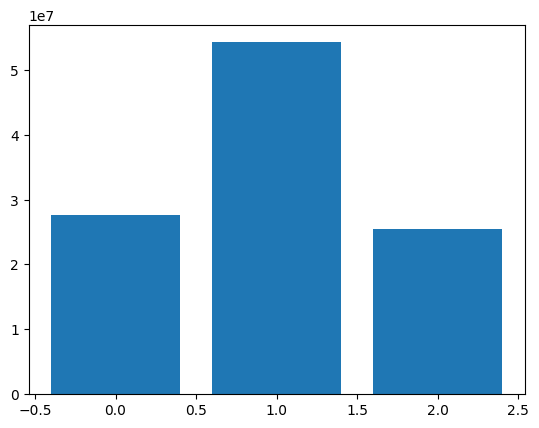

In [567]:
x = lab['GPU_Brand']
y = lab['Price']
plt.bar(x, y)
plt.show()

In [568]:
lab.head()

,Manufacturer,Category,Screen Size,Screen,RAM,Operating System,Weight,Price,Touchscreen,Brand,Generation,Speed,Storage_GB,Storage_Type,GPU_Brand,GPU_Model
0,Apple,Ultrabook,13.3,2,8,macOS,1.37,11912523.48,0,0,7.20,0.64,128,2,0,Intel
1,Apple,Ultrabook,13.3,0,8,macOS,1.34,7993374.48,0,0,7.20,0.50,128,2,0,Intel
2,HP,Notebook,15.6,1,8,No OS,1.86,5112900.00,0,0,7.20,0.69,256,2,0,Intel
3,Apple,Ultrabook,15.4,3,16,macOS,1.83,22563005.40,0,0,7.20,0.75,512,2,2,AMD
4,Apple,Ultrabook,13.3,2,8,macOS,1.37,16037611.20,0,0,7.20,0.86,256,2,0,Intel


In [569]:
lab['Screen Size'] = lab['Screen Size'].astype(float)
lab['Screen'] = lab['Screen'].astype(int)
lab['RAM'] = lab['RAM'].astype(int)
lab['Weight'] = lab['Weight'].astype(float)

In [570]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Category          1302 non-null   object 
 2   Screen Size       1302 non-null   float64
 3   Screen            1302 non-null   int32  
 4   RAM               1302 non-null   int32  
 5   Operating System  1302 non-null   object 
 6   Weight            1302 non-null   float64
 7   Price             977 non-null    float64
 8   Touchscreen       1302 non-null   int64  
 9   Brand             1302 non-null   int32  
 10  Generation        1302 non-null   float64
 11  Speed             1302 non-null   float64
 12  Storage_GB        1302 non-null   int32  
 13  Storage_Type      1302 non-null   int64  
 14  GPU_Brand         1302 non-null   int32  
 15  GPU_Model         1302 non-null   object 
dtypes: float64(5), int32(5), int64(2), object(

In [571]:
columns_to_encode = ['Manufacturer', 'Category', 'Operating System', 'GPU_Model']
encoded_data = pd.get_dummies(lab, columns=columns_to_encode)

In [572]:
train_clean = encoded_data.iloc[:977, :]
test_clean = encoded_data.iloc[977:, :]
train_clean.shape, test_clean.shape

((977, 39), (325, 39))

In [573]:
X = train_clean.drop('Price', axis=1)
y = train_clean.Price

In [574]:
X_train, X_test, y_train, y_test = tts(X, y, train_size = 0.8)
lazy=LazyRegressor()
lazy.fit(X_train, X_test, y_train, y_test)


100%|██████████| 42/42 [00:34<00:00,  1.23it/s]


(                               Adjusted R-Squared  R-Squared          RMSE   
 Model                                                                        
 XGBRegressor                                 0.79       0.83    2739172.73  \
 GradientBoostingRegressor                    0.79       0.83    2741708.24   
 ExtraTreesRegressor                          0.77       0.81    2872571.52   
 LGBMRegressor                                0.75       0.80    2983154.33   
 HistGradientBoostingRegressor                0.75       0.80    2986519.24   
 BaggingRegressor                             0.75       0.80    2989604.90   
 RandomForestRegressor                        0.75       0.80    2994227.25   
 KNeighborsRegressor                          0.73       0.78    3085324.16   
 LassoCV                                      0.68       0.74    3367435.46   
 LarsCV                                       0.68       0.74    3367627.84   
 LassoLarsCV                                  0.68  

In [575]:
test_clean.drop(columns = 'Price' , inplace = True)

In [576]:
GBR = GradientBoostingRegressor()
GBR.fit(X, y)
pred = GBR.predict(test_clean)

muestra['Price'] = pred
muestra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      325 non-null    int64  
 1   Price   325 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.2 KB


In [577]:
muestra.to_csv('../data/muestra(GBR).csv', index = False)


In [578]:
XGBR = XGBRegressor()
XGBR.fit(X, y)
pred2 = XGBR.predict(test_clean)
muestra['Price'] = pred2
muestra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      325 non-null    int64  
 1   Price   325 non-null    float32
dtypes: float32(1), int64(1)
memory usage: 3.9 KB


In [579]:
muestra.to_csv('../data/muestra(XGBR).csv', index = False)


In [580]:
ETR = ExtraTreesRegressor()
ETR.fit(X, y)
pred3 = ETR.predict(test_clean)

muestra['Price'] = pred3
muestra.info

<bound method DataFrame.info of       id       Price
0      0  5634952.88
1      1 14103690.12
2      2 13023681.14
3      3 10518480.18
4      4  6335789.19
5      5  5714664.32
6      6  8709091.56
7      7  6120285.35
8      8  5956597.86
9      9 10095384.00
10    10  5825503.10
11    11  7659278.92
12    12 13376064.87
13    13  4347472.19
14    14  2516624.51
15    15 10059484.03
16    16  9332399.42
17    17 10489047.66
18    18 14384958.31
19    19  3216597.42
20    20 14221914.60
21    21 12865034.52
22    22  9507865.85
23    23  8804680.56
24    24  5831898.23
25    25  8013408.16
26    26 10518480.18
27    27  7968809.44
28    28 10274261.40
29    29 14101162.12
30    30  8595731.01
31    31  7974912.91
32    32  8860344.48
33    33 13815109.15
34    34  6818704.82
35    35 12355596.72
36    36  7760678.84
37    37  9022757.75
38    38  6157017.31
39    39 21170022.03
40    40 10201302.54
41    41 10071523.80
42    42  6070589.74
43    43 11886574.85
44    44  9123992.28
45

In [581]:
muestra.to_csv('../data/muestra(ETR).csv', index = False)